In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor #XGB 회귀
from xgboost import plot_importance as xgb_plot_importance
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor #LGBMR 회귀
from lightgbm import plot_metric, plot_importance, plot_tree #LGBMR plot_metric, importanc
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 


In [2]:
from sklearn.metrics import mean_squared_error
def get_rmse_pred(y_test, pred):
  mse=mean_squared_error(y_test, pred)
  rmse=np.sqrt(mse)
  return rmse

  #평균제곱편차(오차)는 (실제값 - 예측값)의 제곱을 평균화하여 성과지표로 낸 것. 
  #시각적으로 보면 실제값 좌표와 예측값 좌표를 각 대각선 모서리로 갖는 정사각형이 된다. MSE 값은 이 면적의 크기와 동일하다.  
  #따라서 오차가 클수록 사각형이 커진다. MSE가 크다는 것은 특이값이 많다는 것을 의미한다. 
  #RMSE(root mean squared error는 MSE가 너무 크게 나와 실제보다 커지는 특성이 있어서 루트를 씌워 사용)



In [3]:
#MPE(Mean Percentage Error) : MPE는 underperform인지 overperform인지 알 수 있음
def get_mae_pred(y_test, y_pred): 
	return np.mean((y_test - y_pred) / y_test) * 100

#MAPE MPE를 퍼센트로 변환
def get_mape_pred(y_test, pred):
    return np.mean(np.abs((y_test-pred)/y_test))*100

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv("/content/drive/MyDrive/전세_최종_데이터.csv")
df.drop('전용면적(㎡)', axis=1, inplace=True)
df


,보증금(만원),층,건축년도,home_cnt,home_size,room_cnt,bath_cnt,edu,bus,sub_dist,...,"('서초구',)","('성북구',)","('송파구',)","('양천구',)","('영등포구',)","('용산구',)","('은평구',)","('종로구',)","('중구',)","('중랑구',)"
0,40000.0,5,1988,54,77.75,3,1,1,1,0.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,50000.0,2,1988,54,77.75,3,1,1,1,0.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,50000.0,6,1988,54,77.75,3,1,1,1,0.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,49000.0,3,1988,54,77.75,3,1,1,1,0.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,50000.0,9,1988,54,77.75,3,1,1,1,0.84,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521240,33500.0,10,2021,44,29.02,1,1,0,0,0.47,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
521241,33500.0,8,2021,44,29.02,1,1,0,1,3.56,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
521242,33500.0,8,2021,44,29.02,1,1,0,0,0.33,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
521243,33500.0,8,2021,44,29.02,1,1,0,0,0.95,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [6]:
columns=df.columns
columns

Index(['보증금(만원)', '층', '건축년도', 'home_cnt', 'home_size', 'room_cnt', 'bath_cnt',
       'edu', 'bus', 'sub_dist', '1호선', '2호선', '3호선', '4호선', '5호선', '6호선',
       '7호선', '8호선', '9호선', '살인 검거율', '강도 검거율', '강간,추행 검거율', '절도 검거율',
       '폭력 검거율', '인구 십만명당 살인발생', '인구 십만명당 강도발생', '인구 십만명당 강간,추행발생',
       '인구 십만명당 절도발생', '인구 십만명당 폭력발생', 'park', 'han_park', 'center_weight',
       'rate', '('강남구',)', '('강북구',)', '('강서구',)', '('관악구',)', '('광진구',)',
       '('구로구',)', '('금천구',)', '('노원구',)', '('도봉구',)', '('동대문구',)', '('동작구',)',
       '('마포구',)', '('서대문구',)', '('서초구',)', '('성북구',)', '('송파구',)', '('양천구',)',
       '('영등포구',)', '('용산구',)', '('은평구',)', '('종로구',)', '('중구',)', '('중랑구',)'],
      dtype='object')

In [7]:
from sklearn.preprocessing import MinMaxScaler

mms=MinMaxScaler()
X_mms=pd.DataFrame(mms.fit_transform(df.iloc[:, 1:]), columns=columns[1:])
X_mms

,층,건축년도,home_cnt,home_size,room_cnt,bath_cnt,edu,bus,sub_dist,1호선,...,"('서초구',)","('성북구',)","('송파구',)","('양천구',)","('영등포구',)","('용산구',)","('은평구',)","('종로구',)","('중구',)","('중랑구',)"
0,0.060606,0.410714,0.005260,0.215320,0.285714,0.0,1.0,1.0,0.146691,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.015152,0.410714,0.005260,0.215320,0.285714,0.0,1.0,1.0,0.146691,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.075758,0.410714,0.005260,0.215320,0.285714,0.0,1.0,1.0,0.146691,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.030303,0.410714,0.005260,0.215320,0.285714,0.0,1.0,1.0,0.146691,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.121212,0.410714,0.005260,0.215320,0.285714,0.0,1.0,1.0,0.146691,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521240,0.136364,1.000000,0.004208,0.055737,0.000000,0.0,0.0,0.0,0.080501,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
521241,0.106061,1.000000,0.004208,0.055737,0.000000,0.0,0.0,1.0,0.633274,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
521242,0.106061,1.000000,0.004208,0.055737,0.000000,0.0,0.0,0.0,0.055456,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
521243,0.106061,1.000000,0.004208,0.055737,0.000000,0.0,0.0,0.0,0.166369,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
df_non_cat=df[['보증금(만원)', '층', '건축년도', 'home_cnt', 'home_size', 'room_cnt', 'bath_cnt',
       '살인 검거율', '강도 검거율', '강간,추행 검거율', '절도 검거율',
       '폭력 검거율', '인구 십만명당 살인발생', '인구 십만명당 강도발생', '인구 십만명당 강간,추행발생',
       '인구 십만명당 절도발생', '인구 십만명당 폭력발생', 'rate']]
X_ss=pd.DataFrame(ss.fit_transform(df_non_cat.iloc[:, 1:]), columns=df_non_cat.columns[1:])
X_ss

,층,건축년도,home_cnt,home_size,room_cnt,bath_cnt,살인 검거율,강도 검거율,"강간,추행 검거율",절도 검거율,폭력 검거율,인구 십만명당 살인발생,인구 십만명당 강도발생,"인구 십만명당 강간,추행발생",인구 십만명당 절도발생,인구 십만명당 폭력발생,rate
0,-0.648912,-1.000373,-0.851554,0.044501,0.168010,-1.067634,-0.584711,-0.027649,0.033653,-0.014280,0.304880,0.164586,1.896448,1.519717,1.082712,1.024481,1.740905
1,-1.152475,-1.000373,-0.851554,0.044501,0.168010,-1.067634,-0.584711,-0.027649,0.033653,-0.014280,0.304880,0.164586,1.896448,1.519717,1.082712,1.024481,1.740905
2,-0.481058,-1.000373,-0.851554,0.044501,0.168010,-1.067634,-0.584711,-0.027649,0.033653,-0.014280,0.304880,0.164586,1.896448,1.519717,1.082712,1.024481,1.740905
3,-0.984621,-1.000373,-0.851554,0.044501,0.168010,-1.067634,-0.584711,-0.027649,0.033653,-0.014280,0.304880,0.164586,1.896448,1.519717,1.082712,1.024481,1.740905
4,0.022506,-1.000373,-0.851554,0.044501,0.168010,-1.067634,-0.584711,-0.027649,0.033653,-0.014280,0.304880,0.164586,1.896448,1.519717,1.082712,1.024481,1.740905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521240,0.190360,2.201428,-0.858683,-1.708949,-2.618582,-1.067634,0.633677,-1.665857,0.154313,1.426518,1.288356,-0.615606,-0.866310,-0.741101,-0.670623,-0.532894,0.573178
521241,-0.145349,2.201428,-0.858683,-1.708949,-2.618582,-1.067634,0.633677,-1.665857,0.154313,1.426518,1.288356,-0.615606,-0.866310,-0.741101,-0.670623,-0.532894,0.573178
521242,-0.145349,2.201428,-0.858683,-1.708949,-2.618582,-1.067634,0.633677,-1.665857,0.154313,1.426518,1.288356,-0.615606,-0.866310,-0.741101,-0.670623,-0.532894,0.573178
521243,-0.145349,2.201428,-0.858683,-1.708949,-2.618582,-1.067634,0.633677,-1.665857,0.154313,1.426518,1.288356,-0.615606,-0.866310,-0.741101,-0.670623,-0.532894,0.573178


In [78]:
X_train_mms, X_test_mms, y_train_mms, y_test_mms=train_test_split(
    X_mms, df.iloc[:,0], test_size=0.2)

In [11]:
X_train_ss, X_test_ss, y_train_ss, y_test_ss=train_test_split(
    X_ss, df.iloc[:,0], test_size=0.2)


In [9]:
lgb=LGBMRegressor(random_state=2022)
lgb.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': None,
 'random_state': 2022,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': True,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
param_grid = {
    'num_leaves': [10,30,50],
    'reg_alpha': [0.1,0.3,0.5],
    'min_data_in_leaf': [30, 50, 100],
    }
grid_lgb=GridSearchCV(lgb, param_grid, cv=5)
grid_lgb.fit(X_train_mms, y_train_mms)

KeyboardInterrupt: ignored

In [ ]:
grid_lgb.best_params_

In [ ]:
param_grid = {
    'num_leaves': [160,170,180,190,200],
    'min_data_in_leaf': [5,6,7,8,9],
}
grid_lgb=GridSearchCV(lgb, param_grid, cv=5)
grid_lgb.fit(X_train_ss, y_train_ss)

grid_lgb.best_params_


{'min_data_in_leaf': 9, 'num_leaves': 200}

In [ ]:
param_grid = {
    'num_leaves': [200,210,220,230,240],
    'min_data_in_leaf': [9,10,11,12,13],
    }
grid_lgb=GridSearchCV(lgb, param_grid, cv=5)
grid_lgb.fit(X_train_ss, y_train_ss)
grid_lgb.best_params_

{'min_data_in_leaf': 12, 'num_leaves': 240}

In [ ]:
param_grid = {
    'num_leaves': [240,250,260,270,280],
    'min_data_in_leaf': [12],
    }
grid_lgb=GridSearchCV(lgb, param_grid, cv=5)
grid_lgb.fit(X_train_ss, y_train_ss)
grid_lgb.best_params_

{'min_data_in_leaf': 12, 'num_leaves': 280}

In [ ]:
param_grid = {
    'num_leaves': [280,290,300,310,320],
    'reg_alpha': [0.7,0.9,0.5],
    'min_data_in_leaf': [12],
    }
grid_lgb=GridSearchCV(lgb, param_grid, cv=5)
grid_lgb.fit(X_train_ss, y_train_ss)
grid_lgb.best_params_

{'min_data_in_leaf': 12, 'num_leaves': 320, 'reg_alpha': 0.7}

In [ ]:
param_grid = {
    'num_leaves': [320,330,340,350,360],
    'reg_alpha': [0.7,0.9,0.5],
    'min_data_in_leaf': [12],
    }
grid_lgb=GridSearchCV(lgb, param_grid, cv=5)
grid_lgb.fit(X_train_ss, y_train_ss)
grid_lgb.best_params_

{'min_data_in_leaf': 12, 'num_leaves': 340, 'reg_alpha': 0.5}

In [12]:
lgb=LGBMRegressor(num_leaves=340, min_data_in_leaf=12, reg_alpha=0.7, random_state=2022)

evals=[(X_test_ss, y_test_ss)] 

lgb.fit(X_train_ss, y_train_ss, eval_set=evals, eval_metric='logloss') 
lgb.score(X_test_ss, y_test_ss)

[1]	valid_0's l2: 6.09786e+08
[2]	valid_0's l2: 5.19861e+08
[3]	valid_0's l2: 4.46832e+08
[4]	valid_0's l2: 3.87624e+08
[5]	valid_0's l2: 3.39539e+08
[6]	valid_0's l2: 3.00131e+08
[7]	valid_0's l2: 2.68159e+08
[8]	valid_0's l2: 2.41789e+08
[9]	valid_0's l2: 2.20447e+08
[10]	valid_0's l2: 2.02806e+08
[11]	valid_0's l2: 1.88412e+08
[12]	valid_0's l2: 1.76363e+08
[13]	valid_0's l2: 1.66713e+08
[14]	valid_0's l2: 1.58471e+08
[15]	valid_0's l2: 1.51923e+08
[16]	valid_0's l2: 1.46495e+08
[17]	valid_0's l2: 1.41911e+08
[18]	valid_0's l2: 1.38131e+08
[19]	valid_0's l2: 1.3494e+08
[20]	valid_0's l2: 1.32349e+08
[21]	valid_0's l2: 1.30082e+08
[22]	valid_0's l2: 1.28098e+08
[23]	valid_0's l2: 1.26494e+08
[24]	valid_0's l2: 1.25148e+08
[25]	valid_0's l2: 1.23928e+08
[26]	valid_0's l2: 1.22871e+08
[27]	valid_0's l2: 1.22018e+08
[28]	valid_0's l2: 1.21238e+08
[29]	valid_0's l2: 1.20529e+08
[30]	valid_0's l2: 1.1995e+08
[31]	valid_0's l2: 1.19329e+08
[32]	valid_0's l2: 1.18876e+08
[33]	valid_0's l2: 

0.8442541849467874

In [13]:
lgbm_pred = lgb.predict(X_test_ss)
lgbm_pred

array([19779.69533745, 89761.91255932, 10881.08393217, ...,
       38681.47460318, 29031.86038257, 34353.96363362])

In [10]:
xgb=XGBRegressor()

In [ ]:
parameters = {'learning_rate': [0.04, 0.05, 0.06], #so called `eta` value
              'max_depth': [1,50,100]}

grid_xgb=GridSearchCV(xgb, parameters, cv=5)
grid_xgb.fit(X_train_ss, y_train_ss)

[01:23:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:23:53] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:24:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:24:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:24:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:24:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:30:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[01:37:21] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, estimator=XGBRegressor(),
             param_grid={'learning_rate': [0.04, 0.05, 0.06],
                         'max_depth': [1, 50, 100]})

In [ ]:
grid_xgb.best_params_

{'learning_rate': 0.04, 'max_depth': 50}

In [ ]:
xgb=XGBRegressor(learning_rate=0.04, max_depth=50)
xgb.fit(X_train_ss, y_train_ss)
xgb.score(X_test_ss, y_test_ss)

[05:05:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8244728071772247

In [ ]:
parameters = {'learning_rate': [0.02, 0.03, 0.04], #so called `eta` value
              'max_depth': [50]}

grid_xgb=GridSearchCV(xgb, parameters, cv=5)
grid_xgb.fit(X_train_ss, y_train_ss)

[05:19:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:24:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:29:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:34:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:39:40] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:44:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:50:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[05:56:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

GridSearchCV(cv=5, estimator=XGBRegressor(learning_rate=0.04, max_depth=50),
             param_grid={'learning_rate': [0.02, 0.03, 0.04],
                         'max_depth': [50]})

In [ ]:
grid_xgb.best_params_

{'learning_rate': 0.03, 'max_depth': 50}

In [79]:
xgb=XGBRegressor(learning_rate=0.03, max_depth=50)
xgb.fit(X_train_ss, y_train_ss)
xgb.score(X_test_ss, y_test_ss)

[06:08:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8269028696471343

In [80]:
xgb_pred = xgb.predict(X_test_ss)
xgb_pred

array([16385.379, 85655.14 , 10613.802, ..., 35469.875, 27031.45 ,
       29339.95 ], dtype=float32)

In [ ]:
from sklearn.metrics import mean_squared_error
def get_rmse_pred(y_test, pred):
  mse=mean_squared_error(y_test, pred)
  rmse=np.sqrt(mse)
  return rmse

In [ ]:
get_rmse_pred(y_test_ss, lgbm_pred) #LGBM RMSE

10691.452959987631

In [ ]:
get_rmse_pred(y_test_ss, xgb_pred) #XGB_RMSE

11283.549389467678

In [84]:
mix_pred = (lgb.score(X_test_ss, y_test_ss)/(xgb.score(X_test_ss,y_test_ss)+lgb.score(X_test_ss, y_test_ss)))*lgb.predict(X_test_ss) + (xgb.score(X_test_ss, y_test_ss)/(xgb.score(X_test_ss, y_test_ss)+lgb.score(X_test_ss, y_test_ss)))*xgb.predict(X_test_ss)
mix_pred

array([18100.15810854, 87729.8454038 , 10748.83040228, ...,
       37092.34743594, 28042.03997036, 31872.98642883])

In [ ]:
get_rmse_pred(y_test_ss,mix_pred) #MIX RMSE

10744.723552678492

### 'sub_dist'와 'center_weight'이 있는 Dataset으로 모델 분석

In [94]:
from sklearn.preprocessing import StandardScaler
df_sub_cen=df[['보증금(만원)', '층', '건축년도', 'home_cnt', 'home_size', 'room_cnt', 'bath_cnt',
       '살인 검거율', '강도 검거율', '강간,추행 검거율', '절도 검거율',
       '폭력 검거율', '인구 십만명당 살인발생', '인구 십만명당 강도발생', '인구 십만명당 강간,추행발생',
       '인구 십만명당 절도발생', '인구 십만명당 폭력발생', 'rate','sub_dist','center_weight']]
X_ss_sub=pd.DataFrame(ss.fit_transform(df_sub_cen.iloc[:, 1:]), columns=df_sub_cen.columns[1:])
X_train_ss_sub, X_test_ss_sub, y_train_ss_sub, y_test_ss_sub=train_test_split(
    X_ss_sub, df.iloc[:,0], test_size=0.2)

lgb=LGBMRegressor(num_leaves=340, min_data_in_leaf=12, reg_alpha=0.7, random_state=2022)

evals=[(X_test_ss_sub, y_test_ss_sub)] 

lgb.fit(X_train_ss_sub, y_train_ss_sub, eval_set=evals, eval_metric='logloss') 
print(lgb.score(X_test_ss_sub, y_test_ss_sub))
lgbm_pred_sub = lgb.predict(X_test_ss_sub)
print(get_rmse_pred(y_test_ss_sub, lgbm_pred_sub))



[1]	valid_0's l2: 6.21575e+08
[2]	valid_0's l2: 5.3043e+08
[3]	valid_0's l2: 4.5632e+08
[4]	valid_0's l2: 3.95924e+08
[5]	valid_0's l2: 3.46392e+08
[6]	valid_0's l2: 3.05933e+08
[7]	valid_0's l2: 2.72977e+08
[8]	valid_0's l2: 2.45646e+08
[9]	valid_0's l2: 2.23307e+08
[10]	valid_0's l2: 2.0493e+08
[11]	valid_0's l2: 1.89791e+08
[12]	valid_0's l2: 1.7736e+08
[13]	valid_0's l2: 1.6707e+08
[14]	valid_0's l2: 1.58503e+08
[15]	valid_0's l2: 1.51397e+08
[16]	valid_0's l2: 1.45611e+08
[17]	valid_0's l2: 1.4065e+08
[18]	valid_0's l2: 1.36567e+08
[19]	valid_0's l2: 1.33048e+08
[20]	valid_0's l2: 1.30139e+08
[21]	valid_0's l2: 1.27732e+08
[22]	valid_0's l2: 1.25643e+08
[23]	valid_0's l2: 1.23724e+08
[24]	valid_0's l2: 1.22306e+08
[25]	valid_0's l2: 1.21037e+08
[26]	valid_0's l2: 1.19816e+08
[27]	valid_0's l2: 1.18704e+08
[28]	valid_0's l2: 1.17828e+08
[29]	valid_0's l2: 1.17126e+08
[30]	valid_0's l2: 1.16356e+08
[31]	valid_0's l2: 1.15772e+08
[32]	valid_0's l2: 1.15193e+08
[33]	valid_0's l2: 1.14

In [ ]:
xgb=XGBRegressor(learning_rate=0.03, max_depth=50)
xgb.fit(X_train_ss_sub, y_train_ss_sub)
print(xgb.score(X_test_ss_sub, y_test_ss_sub))
xgb_pred_sub = xgb.predict(X_test_ss_sub)
print(get_rmse_pred(y_test_ss_sub, xgb_pred_sub))

In [ ]:
mix_pred_sub = (lgb.score(X_test_ss_sub, y_test_ss_sub)/(xgb.score(X_test_ss_sub,y_test_ss_sub)+lgb.score(X_test_ss_sub, y_test_ss_sub)))*lgb.predict(X_test_ss_sub) + (xgb.score(X_test_ss_sub, y_test_ss_sub)/(xgb.score(X_test_ss_sub, y_test_ss_sub)+lgb.score(X_test_ss_sub, y_test_ss_sub)))*xgb.predict(X_test_ss_sub)
get_rmse_pred(y_test_ss_sub,mix_pred_sub) #MIX RMSE

## Feature 줄여보기

In [ ]:
from sklearn.preprocessing import StandardScaler
df_light=df[['보증금(만원)', '층', '건축년도', 'home_cnt', 'home_size', 'room_cnt', 'bath_cnt','rate','sub_dist','center_weight']]
X_ss_sub=pd.DataFrame(ss.fit_transform(df_light.iloc[:, 1:]), columns=df_light.columns[1:])
X_train_ss_light, X_test_ss_light, y_train_ss_light, y_test_ss_light=train_test_split(
    X_ss_sub, df.iloc[:,0], test_size=0.2)

lgb=LGBMRegressor(num_leaves=340, min_data_in_leaf=12, reg_alpha=0.7, random_state=2022)

evals=[(X_test_ss_light, y_test_ss_light)] 

lgb.fit(X_train_ss_light, y_train_ss_light, eval_set=evals, eval_metric='logloss') 
print(lgb.score(X_test_ss_light, y_test_ss_light))
lgbm_pred_sub = lgb.predict(X_test_ss_light)
print(get_rmse_pred(y_test_ss_light, lgbm_pred_sub))



[1]	valid_0's l2: 6.20456e+08
[2]	valid_0's l2: 5.33421e+08
[3]	valid_0's l2: 4.6242e+08
[4]	valid_0's l2: 4.04457e+08
[5]	valid_0's l2: 3.57007e+08
[6]	valid_0's l2: 3.18303e+08
[7]	valid_0's l2: 2.86418e+08
[8]	valid_0's l2: 2.6009e+08
[9]	valid_0's l2: 2.38257e+08
[10]	valid_0's l2: 2.20099e+08
[11]	valid_0's l2: 2.05342e+08
[12]	valid_0's l2: 1.92918e+08
[13]	valid_0's l2: 1.82265e+08
[14]	valid_0's l2: 1.73552e+08
[15]	valid_0's l2: 1.66446e+08
[16]	valid_0's l2: 1.60275e+08
[17]	valid_0's l2: 1.55068e+08
[18]	valid_0's l2: 1.50566e+08
[19]	valid_0's l2: 1.46801e+08
[20]	valid_0's l2: 1.43626e+08
[21]	valid_0's l2: 1.40766e+08
[22]	valid_0's l2: 1.38459e+08
[23]	valid_0's l2: 1.36402e+08
[24]	valid_0's l2: 1.34633e+08
[25]	valid_0's l2: 1.32986e+08
[26]	valid_0's l2: 1.3153e+08
[27]	valid_0's l2: 1.30297e+08
[28]	valid_0's l2: 1.29216e+08
[29]	valid_0's l2: 1.28086e+08
[30]	valid_0's l2: 1.27159e+08
[31]	valid_0's l2: 1.26359e+08
[32]	valid_0's l2: 1.25654e+08
[33]	valid_0's l2: 1

In [ ]:
xgb=XGBRegressor(learning_rate=0.03, max_depth=50)
xgb.fit(X_train_ss_light, y_train_ss_light)
print(xgb.score(X_test_ss_light, y_test_ss_light))
xgb_pred_sub = xgb.predict(X_test_ss_light)
print(get_rmse_pred(y_test_ss_light, xgb_pred_sub))

mix_pred_sub = (lgb.score(X_test_ss_light, y_test_ss_light)/(xgb.score(X_test_ss_light,y_test_ss_light)+lgb.score(X_test_ss_light, y_test_ss_light)))*lgb.predict(X_test_ss_light) + (xgb.score(X_test_ss_light, y_test_ss_light)/(xgb.score(X_test_ss_light, y_test_ss_light)+lgb.score(X_test_ss_light, y_test_ss_light)))*xgb.predict(X_test_ss_light)
get_rmse_pred(y_test_ss_light,mix_pred_sub) #MIX RMSE

[00:40:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.8264699557004683
11236.723080625983


10655.303821998592

In [51]:
y_test_ss_np=y_test_ss.tolist()
y_test_ss_np=np.array(y_test_ss_np)
y_test_ss_np

array([17000., 83000., 11000., ..., 35000., 28000., 50000.])

In [52]:
lgbm_np=lgbm_pred.round(0).tolist()
lgbm_np = np.array(lgbm_np)
lgbm_np

array([19780., 89762., 10881., ..., 38681., 29032., 34354.])

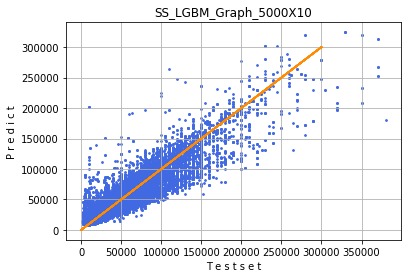

In [152]:
import matplotlib.pyplot as plt
from numpy import random

for i in range(20):
    n = np.random.randint(1,90000)

    x_line = np.linspace(0,300000)
    y_line = x_line
    plt.plot(x_line, y_line, 'darkorange', label='y=x')
    plt.title('SS_LGBM_Graph_5000X10')


    x = y_test_ss_np[n:n+5000]
    y = lgbm_np[n:n+5000]



    plt.scatter(x, y,s=3, color = 'royalblue')


plt.xlabel('T e s t s e t', color = 'black')
plt.ylabel('P r e d i c t', color = 'black')
plt.grid()
plt.savefig('SS_LGBM_Graph_5000X10')
plt.show()



In [150]:
xgb_np=xgb_pred.round(0).tolist()
xgb_np = np.array(xgb_np)

y_test_ss_np=y_test_ss.tolist()
y_test_ss_np=np.array(y_test_ss_np)
y_test_ss_np

AttributeError: ignored

In [103]:
len(xgb_np)

104249

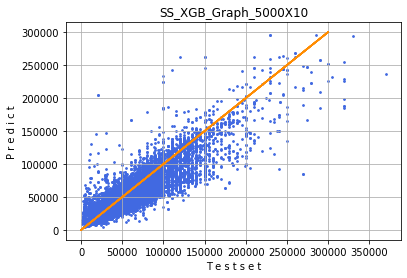

In [156]:
import matplotlib.pyplot as plt
from numpy import random

for i in range(10):
    n = np.random.randint(1,90000)

    x_line = np.linspace(0,300000)
    y_line = x_line
    plt.plot(x_line, y_line, 'darkorange', label='y=x')
    plt.title('SS_XGB_Graph_5000X10')


    x = y_test_ss_np[n:n+5000]
    y = xgb_np[n:n+5000]
    plt.scatter(x, y,s=3,color = 'royalblue')

  
plt.xlabel('T e s t s e t', color = 'black')
plt.ylabel('P r e d i c t', color = 'black')
plt.savefig('SS_XGB_Graph_5000X10')
plt.grid()
plt.show()


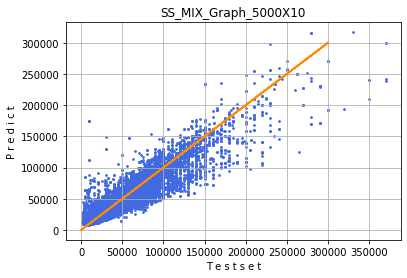

In [164]:
mix_np=mix_pred.round(0).tolist()
mix_np=np.array(mix_np)

import matplotlib.pyplot as plt
from numpy import random

for i in range(10):
    n = np.random.randint(1,90000)

    x_line = np.linspace(0,300000)
    y_line = x_line
    plt.plot(x_line, y_line, 'darkorange', label='y=x')
    plt.title('SS_MIX_Graph_5000X10')
   

    x = y_test_ss_np[n:n+5000]
    y = mix_np[n:n+5000]

    plt.xlabel('T e s t s e t', color = 'black')
    plt.ylabel('P r e d i c t', color = 'black')
    plt.scatter(x, y,s=3,color = 'royalblue')

plt.savefig('SS_MIX_Graph_5000X10')
plt.grid()
plt.show()


[38822. 40755. 38393. ... 15692. 38996. 62643.]


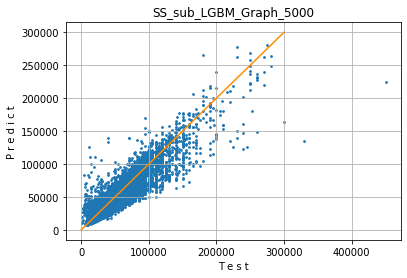

In [161]:
lgbm_pred_sub_np=lgbm_pred_sub.round(0).tolist()
lgbm_pred_sub_np=np.array(lgbm_pred_sub_np)
print(lgbm_pred_sub_np)
import matplotlib.pyplot as plt
from numpy import random

n = np.random.randint(1,80000)

x_line = np.linspace(0,300000)
y_line = x_line
plt.plot(x_line, y_line, 'darkorange', label='y=x')
plt.title('SS_sub_LGBM_Graph_5000')
plt.grid()

x = y_test_ss_sub[n:n+20000]
y = lgbm_pred_sub_np[n:n+20000]

plt.xlabel('T e s t', color = 'black')
plt.ylabel('P r e d i c t', color = 'black')
plt.savefig('SS_sub_LGBM_Graph_5000')
plt.scatter(x, y,s=3)
plt.show()
